In [126]:
import lightkurve as lk

In [127]:
search_result = lk.search_targetpixelfile('Pi Mensae', mission='TESS', sector=1)

In [128]:
search_result

#,observation,target_name,productFilename,distance
0,TESS Sector 1,261136679,tess2018206045859-s0001-0000000261136679-0120-s_tp.fits,0.0


In [129]:
tpf = search_result.download(quality_bitmask='default')

In [130]:
tpf

TessTargetPixelFile(TICID: 261136679)

In [131]:
tpf.mission

'TESS'

In [132]:
tpf.targetid  # TESS Input Catalog (TIC) Identifier

261136679

In [133]:
tpf.sector  # TESS Observation Sector

1

In [134]:
tpf.camera  # TESS Camera Number

4

In [135]:
tpf.ccd  # TESS CCD Number

2

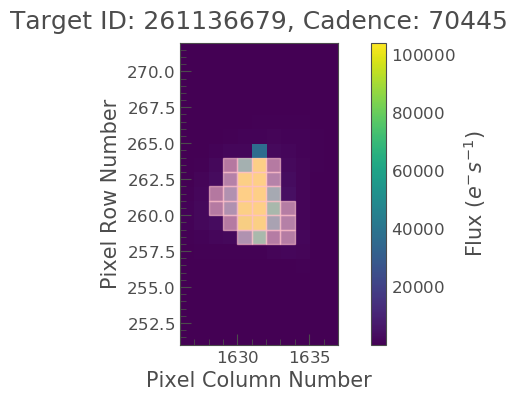

In [136]:
%matplotlib inline
tpf.plot(aperture_mask=tpf.pipeline_mask);

In [137]:
tpf.time

array([1325.29698328, 1325.29837215, 1325.29976102, ..., 1353.17431099,
       1353.17569985, 1353.17708871])

In [138]:
tpf.flux

array([[[  -1.3825388,  -37.66533  ,  -91.830536 , ..., -108.04645  ,
         -103.54175  , -134.1816   ],
        [-135.68407  , -125.30367  , -112.52773  , ..., -113.03839  ,
         -122.92997  , -131.28302  ],
        [-147.63722  , -142.73625  , -134.99854  , ..., -101.330734 ,
         -114.31767  , -121.03055  ],
        ...,
        [-138.13503  , -137.8448   , -146.29425  , ...,  -77.273094 ,
         -105.22347  , -135.82652  ],
        [-142.20255  , -139.6766   , -147.65201  , ..., -118.81814  ,
         -129.52805  , -130.46175  ],
        [-133.71326  , -134.32669  , -148.82013  , ..., -127.16725  ,
          -90.90953  , -112.974434 ]],

       [[  -3.390986 ,  -47.140965 ,  -90.53796  , ..., -106.87563  ,
         -108.55464  , -136.6413   ],
        [-133.7175   , -125.38933  , -114.30842  , ..., -115.82087  ,
         -125.8608   , -132.87209  ],
        [-147.48918  , -142.87836  , -138.43767  , ..., -103.16773  ,
         -116.372955 , -119.86726  ],
        ...,


In [139]:
tpf.flux[0]

array([[-1.38253880e+00, -3.76653290e+01, -9.18305359e+01,
        -1.29922272e+02, -1.45692978e+02, -1.35893311e+02,
        -9.54683685e+01, -8.85729370e+01, -1.08046448e+02,
        -1.03541748e+02, -1.34181595e+02],
       [-1.35684067e+02, -1.25303673e+02, -1.12527733e+02,
        -1.35690414e+02, -1.45928650e+02, -1.27757614e+02,
        -6.09818077e+01, -7.37526398e+01, -1.13038391e+02,
        -1.22929970e+02, -1.31283020e+02],
       [-1.47637222e+02, -1.42736252e+02, -1.34998535e+02,
        -1.41663147e+02, -1.40064377e+02, -1.18161720e+02,
        -5.37216644e+01, -6.23722382e+01, -1.01330734e+02,
        -1.14317673e+02, -1.21030548e+02],
       [-1.49992447e+02, -1.43351776e+02, -1.39589264e+02,
        -1.37442719e+02, -1.31207718e+02, -9.68078690e+01,
        -1.37817793e+01, -3.41951828e+01, -7.66406403e+01,
        -8.33256989e+01, -8.85187225e+01],
       [-1.37578445e+02, -1.28364151e+02, -1.26376915e+02,
        -1.21656555e+02, -1.14596848e+02, -5.06528702e+01,
  

In [140]:
lc = tpf.to_lightcurve()

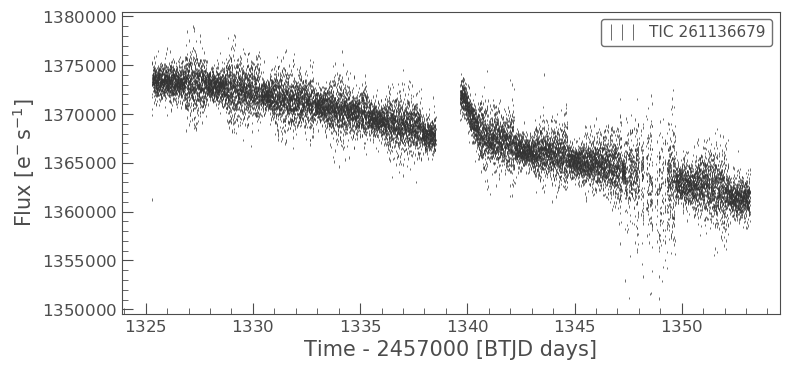

In [141]:
lc.errorbar();

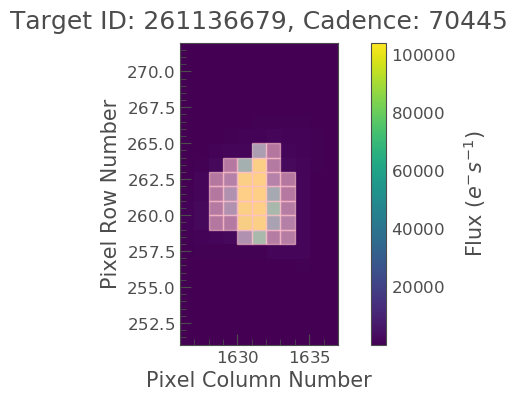

In [142]:
aperture_mask = tpf.create_threshold_mask(threshold=10)

# Plot that aperture
tpf.plot(aperture_mask=aperture_mask);

In [143]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)

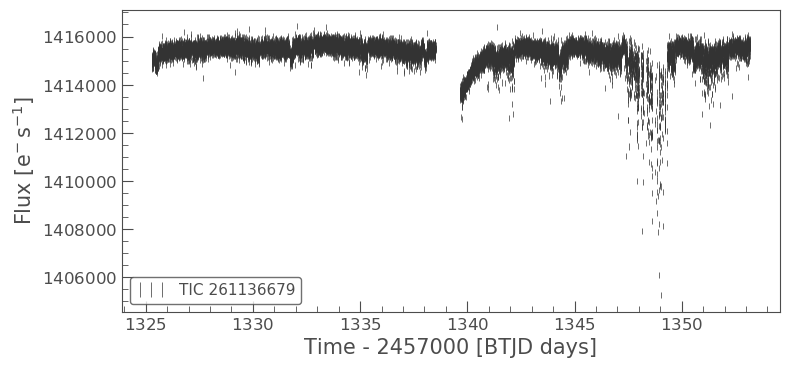

In [144]:
lc.errorbar();

In [145]:
# Number of cadences in the full light curve
print(lc.time.shape)

(18104,)


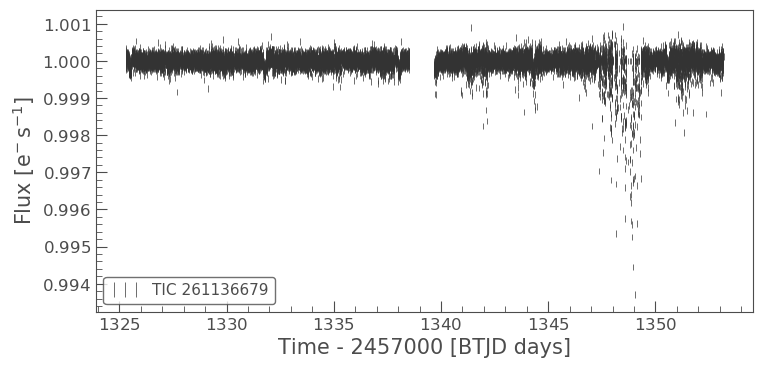

In [146]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar();

In [147]:
# Flag the times that are good quality
mask = (flat_lc.time < 1346) | (flat_lc.time > 1350)

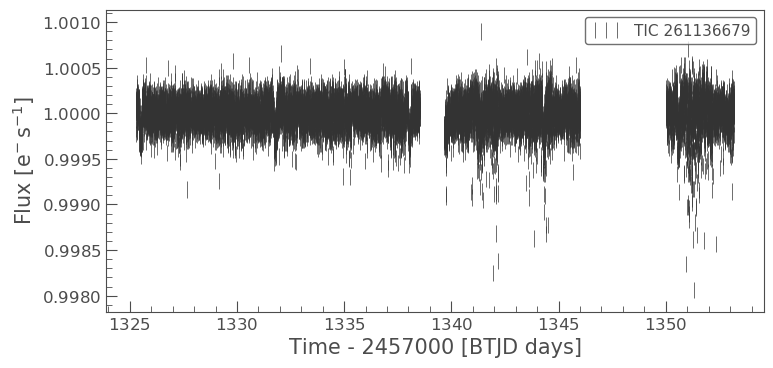

In [148]:
masked_lc = flat_lc[mask]
masked_lc.errorbar();

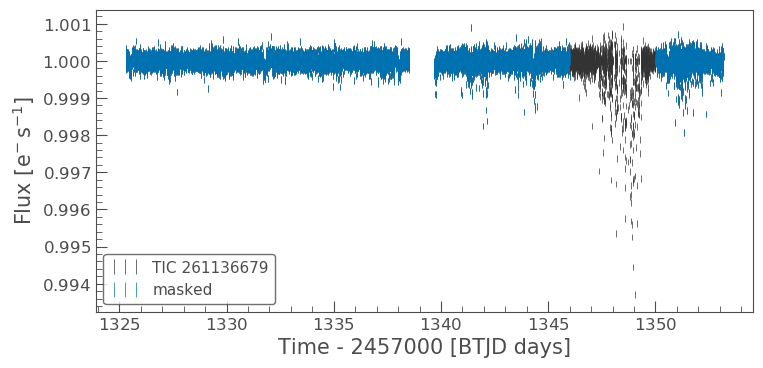

In [149]:
# First define the `matplotlib.pyplot.axes`
ax = flat_lc.errorbar()

# Pass that axis to the next plot
masked_lc.errorbar(ax=ax, label='masked');

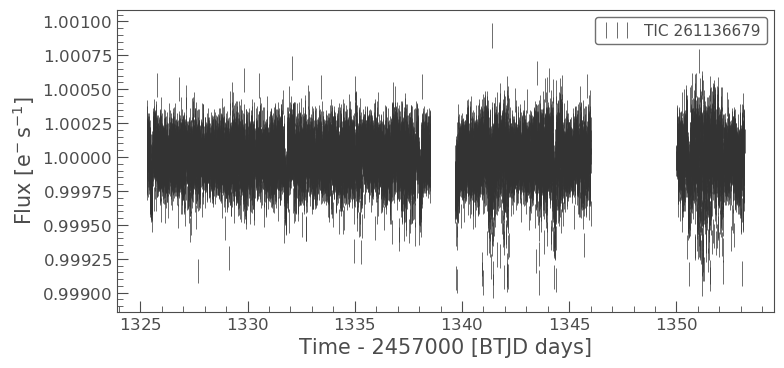

In [150]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.errorbar();

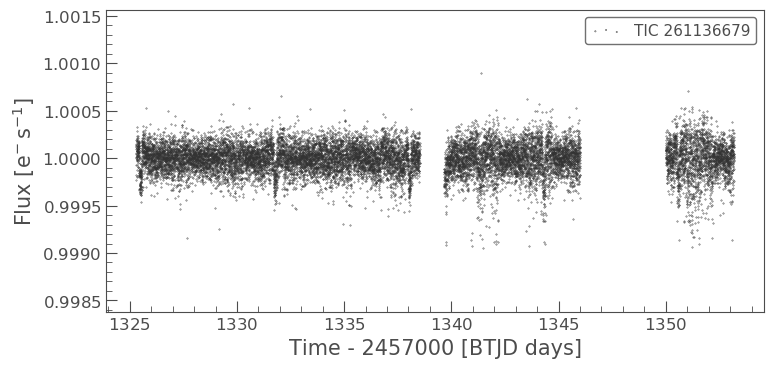

In [151]:
clipped_lc.scatter(s=0.1);

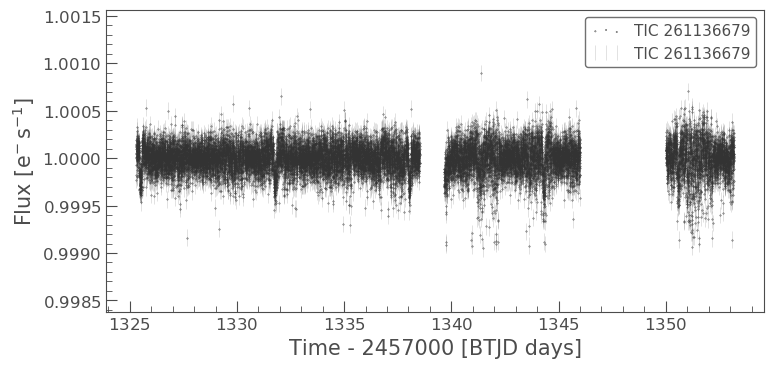

In [152]:
ax = clipped_lc.scatter(s=0.1)
clipped_lc.errorbar(ax=ax, alpha=0.2);  # alpha determines the transparency

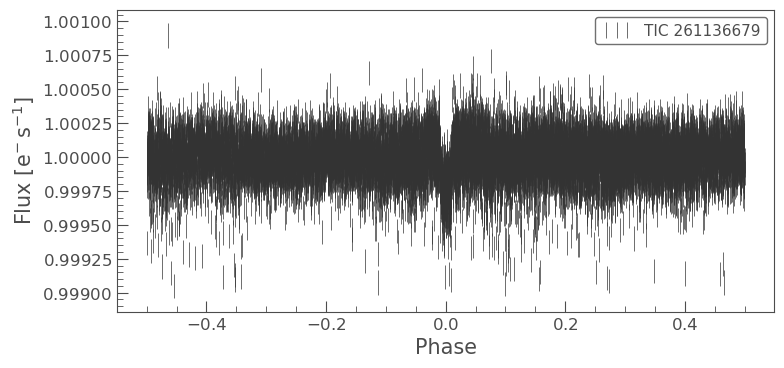

In [304]:
p = 6.2679 #period of the planet's orbit
t0 = 1325.504 #start time of the transit (t zero)
folded_lc = clipped_lc.fold(p, t0)
folded_lc.errorbar();

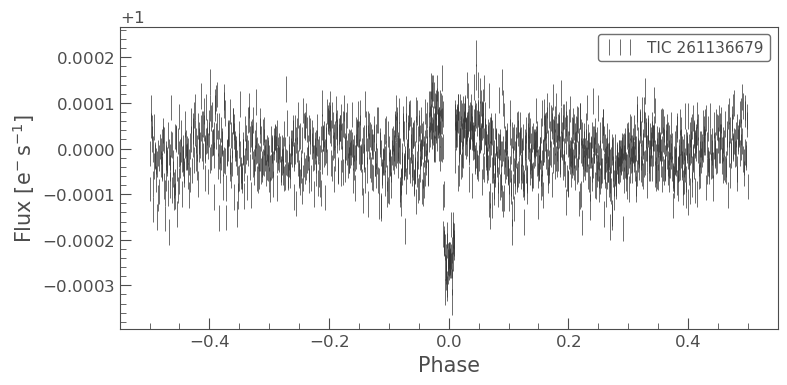

In [305]:
binned_lc = folded_lc.bin(binsize=10)  # Average 10 points per bin
binned_lc.errorbar();

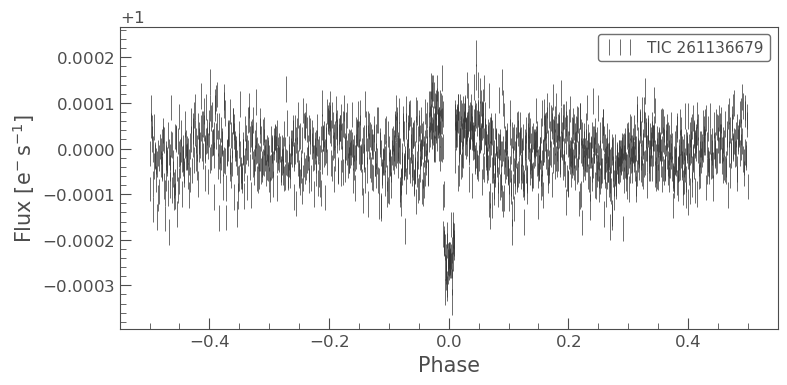

In [306]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)
lc = lc[mask]
lc.remove_outliers(sigma=6).fold(p, t0).bin(binsize=10).errorbar();

In [307]:
# Use the default
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask).flatten(window_length=1001)
lc = lc[mask].remove_outliers(6).fold(p, t0).bin(10)

# Use a custom aperture
custom_lc = tpf.to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)

custom_mask = (custom_lc.time < 1346) | (custom_lc.time > 1350)
custom_lc = custom_lc[(custom_mask)].remove_outliers(6).fold(p, t0).bin(10)

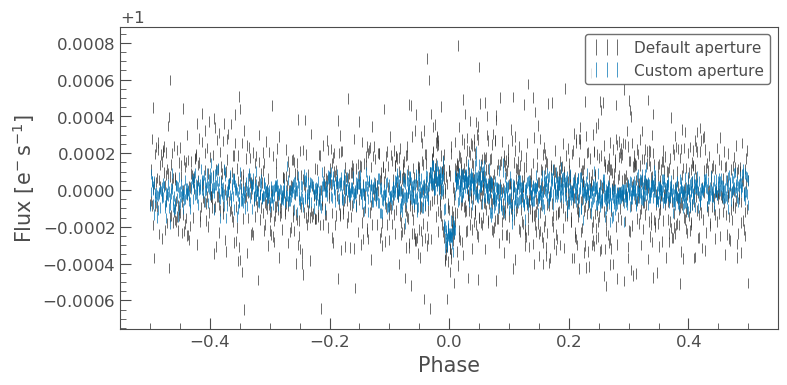

In [308]:
ax = lc.errorbar(label='Default aperture')
custom_lc.errorbar(ax=ax, label='Custom aperture');

In [309]:
import batman
import numpy as np
import matplotlib.pyplot as plt

In [310]:
params = batman.TransitParams()       #object to store transit parameters
params.t0 = t0                        #time of inferior conjunction
params.per = p                       #orbital period
params.rp = 0.0187                      #planet radius (in units of stellar radii)
params.a = 14.7                        #semi-major axis (in units of stellar radii)
params.inc = 87.4                     #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "nonlinear"        #limb darkening model
# options for limb_dark = “square-root”, “logarithmic”, “exponential”, “nonlinear”, “power2”, and “custom”
params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.5, 0.5, 1000)  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model

In [311]:
flux = m.light_curve(params) 

In [312]:
radii = np.linspace(0.09, 0.11, 20)
for r in radii:
        params.rp = r                           #updates planet radius
        new_flux = m.light_curve(params)        #recalculates light curve

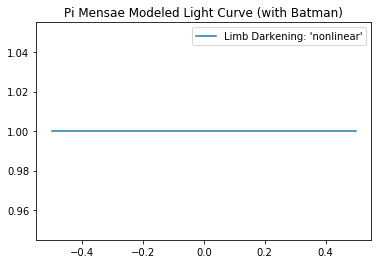

In [313]:
plt.title("Pi Mensae Modeled Light Curve (with Batman)")
plt.plot(t, flux, label = "Limb Darkening: 'nonlinear'")
plt.legend()
plt.show()

In [314]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [315]:
sys.path.append('..')

In [316]:
from PyTransit.pytransit import QuadraticModel

In [317]:
tm = QuadraticModel()

In [318]:
len(fluxes)

18104

In [319]:
tm.set_data(tpf.time)

In [375]:
ldc = [0.3, 0.1]

In [376]:
fluxes = tm.evaluate_ps(k = (0.01703), ldc = ldc, t0 = t0, p = p, a = 0.06839, i = 87.456)

In [377]:
fluxes

array([0.99967119, 0.99967119, 0.99967119, ..., 1.        , 1.        ,
       1.        ])

In [378]:
import matplotlib.pyplot as plt

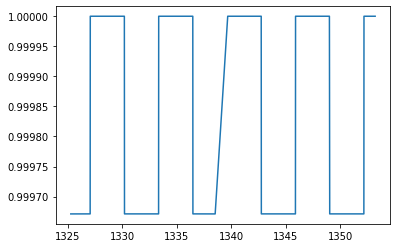

In [379]:
plt.plot(tpf.time, fluxes)

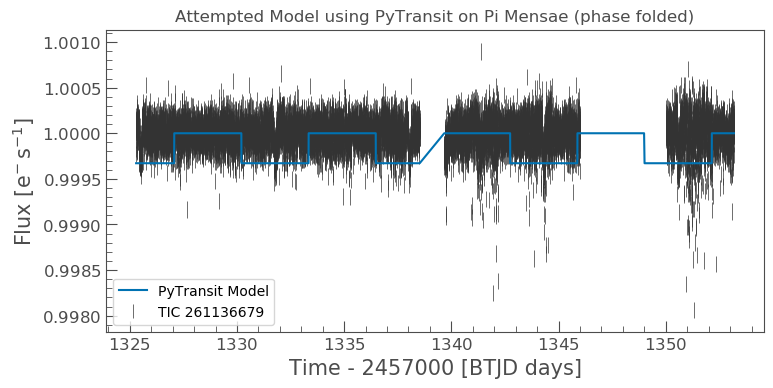

In [380]:
masked_lc.errorbar();
plt.plot(tpf.time, fluxes, label="PyTransit Model")
plt.title("Attempted Model using PyTransit on Pi Mensae (phase folded)")
plt.legend()

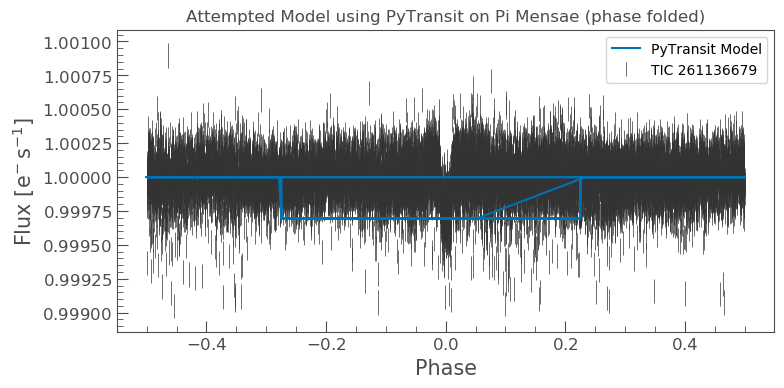

In [369]:
folded_lc.errorbar();
plt.plot(((tpf.time%p)/p)-(0.5), fluxes, label="PyTransit Model")
plt.title("Attempted Model using PyTransit on Pi Mensae (phase folded)")
plt.legend()